# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [6]:
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [7]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [10]:
type(temp) #Es un dataframe

pandas.core.frame.DataFrame

In [11]:
temp.dtypes # las variables 'city' y 'state' son object y 'temperature' son floats

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [18]:
temp_ny = temp.loc[temp.loc[:,'State'] == 'New York']
temp_ny

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [21]:
round(np.array(temp_ny.Temperature).mean(),3)

10.741

#### We want to know cities and states with Temperature above 15 degress Celcius

In [24]:
sup15 = temp['Temperature']>15
temp[sup15]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [25]:
temp[sup15].City

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [34]:
temp.loc[(temp.Temperature>15) & (temp.Temperature<20)]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [47]:
temp.groupby('State').agg([np.mean, np.std])

Temperature          
                   mean       std
State                            
Connecticut   15.833333  1.964186
New Jersey    21.111111  1.571348
New York      10.740741  8.133404

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [49]:
employee = pd.read_csv('employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [50]:
employee.dtypes # Los datos con texto son de tipo object y los numéricos son int.

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

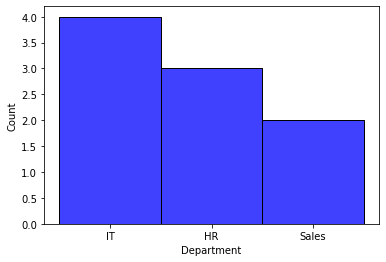

In [54]:
sns.histplot(x=employee.Department, color='b');

#### What's the average salary in this company?

In [55]:
round(np.array(employee.Salary).mean(),3)

48.889

#### What's the highest salary?

In [56]:
np.array(employee.Salary).max()

70

#### What's the lowest salary?

In [57]:
np.array(employee.Salary).min()

30

#### Who are the employees with the lowest salary?

In [62]:
employee.loc[employee.loc[:,'Salary'] == 30]

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [60]:
employee.loc[employee.loc[:,'Name'] == 'David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [73]:
pd.DataFrame(employee.loc[employee.loc[:,'Name'] == 'David'].Salary)

,Salary
2,30


#### Print all the rows where job title is associate

In [75]:
employee.loc[employee.loc[:,'Title'] == 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [76]:
employee.iloc[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [77]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [79]:
employee.loc[(employee['Title'] == 'associate') & (employee['Salary']>55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [80]:
employee.groupby('Years').agg([np.mean])

,Salary
,mean
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [83]:
employee.groupby('Title').agg({'Salary':'mean'})

,Salary
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

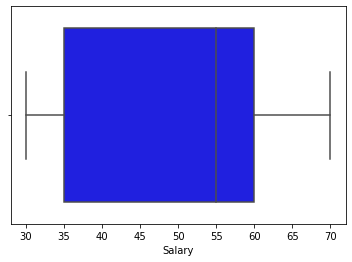

In [85]:
sns.boxplot(x=employee.Salary, color='b');

In [90]:
employee['Salary'].quantile(.25)
# np.quantile(employee.Salary, 0.25)

35.0

In [91]:
employee['Salary'].quantile(.75)

60.0

#### Is the mean salary per gender different?

In [92]:
employee.groupby('Gender').agg({'Salary':'mean'})

,Salary
Gender,
F,47.5
M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [104]:
new = employee.groupby('Department').agg([np.mean, np.max, np.min])
new

Years           Salary          
                mean amax amin   mean amax amin
Department                                     
HR          4.666667    8    2  45.00   70   30
IT          4.500000    8    1  48.75   70   30
Sales       2.500000    3    2  55.00   55   55

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [102]:
new['difference'] = new.Salary.amax - new.Salary.amin
new

Years           Salary           difference
                mean amax amin   mean amax amin           
Department                                                
HR          4.666667    8    2  45.00   70   30         40
IT          4.500000    8    1  48.75   70   30         40
Sales       2.500000    3    2  55.00   55   55          0

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [146]:
orders = pd.read_csv('Orders.csv')
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [108]:
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [113]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


In [145]:
pd.set_option('display.max_columns', None)
orders.sample(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
286299,395321,571032,22469,2011,10,4,12,heart of wicker small,1,2011-10-13 12:38:00,1.65,13827,United Kingdom,1.65
390702,530300,580833,85032A,2011,12,2,11,romantic images gift wrap set,2,2011-12-06 11:41:00,0.65,16764,United Kingdom,1.30
232009,327757,565726,84879,2011,9,2,11,assorted colour bird ornament,8,2011-09-06 11:58:00,1.69,14360,United Kingdom,13.52
309542,423320,573138,23090,2011,10,4,17,vintage glass t-light holder,24,2011-10-27 17:22:00,0.83,15023,United Kingdom,19.92
87625,132440,547664,21394,2011,3,4,13,red polkadot beaker,12,2011-03-24 13:16:00,0.39,13069,United Kingdom,4.68


####  What is the average Purchase Price?

In [120]:
round(orders.amount_spent.mean(),3)

22.395

#### What were the highest and lowest purchase prices? 

In [121]:
orders.amount_spent.max()

168469.6

In [122]:
orders.amount_spent.min()

0.0

#### Select all the customers we have in Spain

In [144]:
spain_customers = orders.loc[orders.loc[:,'Country'] == 'Spain']
spain_customers.sample(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
37449,61945,541491,20967,2011,1,2,14,grey floral feltcraft shoulder bag,4,2011-01-18 14:04:00,3.75,12510,Spain,15.00
394724,535262,581193,23372,2011,12,3,17,set 36 colour pencils dolly girl,1,2011-12-07 17:05:00,1.25,17097,Spain,1.25
13983,21574,538095,21883,2010,12,4,14,stars gift tape,2,2010-12-09 14:55:00,0.65,17097,Spain,1.30
160220,229024,557007,23145,2011,6,4,11,zinc t-light holder star large,12,2011-06-16 11:30:00,0.95,12484,Spain,11.40
378139,511484,579503,23452,2011,11,2,16,heart mini portrait frame,1,2011-11-29 16:23:00,1.95,17097,Spain,1.95


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [137]:
spain_customers['Country'].value_counts()

Spain    2485
Name: Country, dtype: int64

#### Select all the customers who have bought more than 50 items ?

In [143]:
(orders.loc[(orders['Quantity'] > 50)]).sample(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
28721,46704,540357,21876,2011,1,4,15,pottering mug,108,2011-01-06 15:14:00,0.42,13093,United Kingdom,45.36
349381,475092,576861,21080,2011,11,3,16,set/20 red retrospot paper napkins,96,2011-11-16 16:00:00,0.72,18041,United Kingdom,69.12
231693,327427,565668,21669,2011,9,2,9,blue stripe ceramic drawer knob,96,2011-09-06 09:15:00,1.25,15291,United Kingdom,120.00
75227,115569,546134,22860,2011,3,3,15,easter tin chicks pink daisy,60,2011-03-09 15:35:00,1.65,13493,Switzerland,99.00
160144,228948,557005,22661,2011,6,4,11,charlotte bag dolly girl design,100,2011-06-16 11:24:00,0.72,13700,United Kingdom,72.00


#### Select orders from Spain that are above 50 items

In [149]:
(orders.loc[(orders.loc[:,'Country'] == 'Spain') & (orders['Quantity']>50)]).sample(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
289142,398639,571255,72802B,2011,10,5,17,ocean scent candle in jewelled box,200,2011-10-14 17:13:00,1.25,12454,Spain,250.00
32457,52419,540785,84997A,2011,1,2,11,green 3 piece polkadot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
32456,52418,540785,84997C,2011,1,2,11,blue 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
174443,248798,558871,20727,2011,7,1,13,lunch bag black skull.,100,2011-07-04 13:19:00,1.45,12557,Spain,145.00
366328,495741,578321,84997D,2011,11,3,16,childrens cutlery polkadot pink,360,2011-11-23 16:59:00,3.75,12557,Spain,1350.00


#### Select all free orders

In [152]:
(orders.loc[(orders['UnitPrice'] == 0)]).sample(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
137127,198383,554037,22619,2011,5,5,14,set of 6 soldier skittles,80,2011-05-20 14:13:00,0.0,12415,Australia,0.0
334243,454464,575579,22089,2011,11,4,11,paper bunting vintage paisley,24,2011-11-10 11:49:00,0.0,13081,United Kingdom,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
273926,379913,569716,22778,2011,10,4,8,glass cloche small,2,2011-10-06 08:17:00,0.0,15804,United Kingdom,0.0
259399,361825,568384,M,2011,9,2,9,manual,1,2011-09-27 09:46:00,0.0,12748,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [164]:
lunch_bag = orders.loc[orders['Description'].str.contains('lunch bag')]
lunch_bag.sample(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
62598,98890,544685,22662,2011,2,2,17,lunch bag dolly girl design,10,2011-02-22 17:13:00,1.65,13285,United Kingdom,16.5
225097,315918,564740,23208,2011,8,7,14,lunch bag vintage leaf design,2,2011-08-28 14:39:00,1.65,14044,United Kingdom,3.3
56459,90565,544051,20728,2011,2,2,12,lunch bag cars blue,10,2011-02-15 12:40:00,1.65,16700,United Kingdom,16.5
66767,104154,545150,22384,2011,2,1,12,lunch bag pink polkadot,10,2011-02-28 12:27:00,1.65,14227,United Kingdom,16.5
91002,136286,547960,20726,2011,3,1,15,lunch bag woodland,2,2011-03-28 15:27:00,1.65,15644,United Kingdom,3.3


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [162]:
(lunch_bag.loc[lunch_bag['year'] == 2011]).sample(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
278369,385358,570197,22382,2011,10,5,15,lunch bag spaceboy design,2,2011-10-07 15:45:00,1.65,13755,United Kingdom,3.30
392828,533122,581014,22384,2011,12,3,9,lunch bag pink polkadot,10,2011-12-07 09:34:00,1.65,16458,United Kingdom,16.50
393537,534061,581131,23583,2011,12,3,12,lunch bag paisley park,10,2011-12-07 12:51:00,1.65,16393,United Kingdom,16.50
246996,346556,567189,23208,2011,9,1,9,lunch bag vintage leaf design,10,2011-09-19 09:10:00,1.65,17069,United Kingdom,16.50
176445,252579,559128,23208,2011,7,3,12,lunch bag vintage leaf design,3,2011-07-06 12:39:00,1.65,17238,United Kingdom,4.95


#### Show the frequency distribution of the amount spent in Spain.

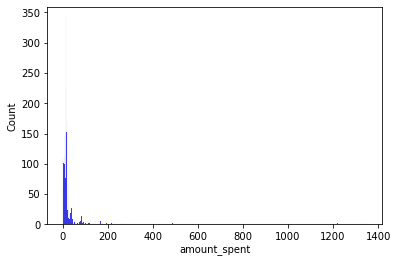

In [169]:
sns.histplot(x=spain_customers.amount_spent, color='b');

#### Select all orders made in the month of August

In [175]:
august = (orders.loc[(orders['month'] == 8)])
august.sample(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
204188,291396,562450,22663,2011,8,5,8,jumbo bag dolly girl design,20,2011-08-05 08:40:00,2.08,12562,France,41.60
217852,307976,563933,22571,2011,8,7,15,rocking horse red christmas,2,2011-08-21 15:54:00,0.85,16536,United Kingdom,1.70
205725,293138,562580,22554,2011,8,7,13,plasters in tin woodland animals,12,2011-08-07 13:31:00,1.65,14024,United Kingdom,19.80
201379,287979,562125,21329,2011,8,2,17,dinosaurs writing set,2,2011-08-02 17:29:00,1.65,17887,United Kingdom,3.30
224175,314995,564713,23247,2011,8,7,10,biscuit tin 50's christmas,2,2011-08-28 10:43:00,2.89,16768,United Kingdom,5.78


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [194]:
pd.DataFrame(orders[orders.month == 8]['Country'].value_counts())

,Country
United Kingdom,23105
Germany,795
EIRE,593
France,569
Netherlands,280
Switzerland,267
Spain,252
Belgium,194
Israel,171
Channel Islands,140


#### What's the  average amount of money spent by country

In [196]:
orders.groupby('Country').agg({'amount_spent':'mean'})

,amount_spent
Country,
Australia,116.895620
Austria,25.624824
Bahrain,32.258824
Belgium,20.283772
Brazil,35.737500
Canada,24.280662
Channel Islands,27.340160
Cyprus,22.134169
Czech Republic,33.069600


#### What's the most expensive item?

In [208]:
orders.UnitPrice.max()

8142.75

In [210]:
orders.loc[orders.loc[:,'UnitPrice'] == orders.UnitPrice.max()]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
118352,173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What was the average amount spent per year ?

In [207]:
orders.groupby('year').agg({'amount_spent':'mean'})

,amount_spent
year,
2010,21.892733
2011,22.430074
